# Clinical records about heart failures.

This dataset is a base for a small app where the peeps answer some questions and become as an answer if they have a heart failure or not. The dataset is from Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.width = 0
pd.options.display.max_rows = None

## Data exploration & cleaning.

Let's read the file and have first look on it:

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
throw_time = 'time'
df = df.drop(throw_time, axis=1)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


The data is really small, has 299 rows and 12 features. All features are scalars. There are also boolean values:
- anaemia 0-no, 1-yes
- diabetes 0-no, 1-yes
- high_blood_presure 0-no, 1-yes
- sex 0-female, 1-male
- smoking 0-no, 1-yes
- death_event 0-no, 1-yes

We check if we find some zero values:

In [7]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
DEATH_EVENT                 False
dtype: bool

Let's drop also the possible infinite values.

In [8]:
pd.set_option('use_inf_as_na', True)
df = df.replace([np.inf, -np.inf], 0).dropna(subset=df.columns, how="all")

Data is clean so let's have a look on it more deeply.

For first we could check for Pearsons Correlation if there is any linear correlation:

In [9]:
corr_matrix = df.corr()
check_death_event = corr_matrix['DEATH_EVENT'].sort_values(ascending=False)
check_death_event

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64

There are several correlations like the level of Serum Creatinine and Age or negative correlations like the Ejection fraction or the level of Serum sodium. Surprising for me the very low negative correlation of Smoking!

Let's check the distribution of data.

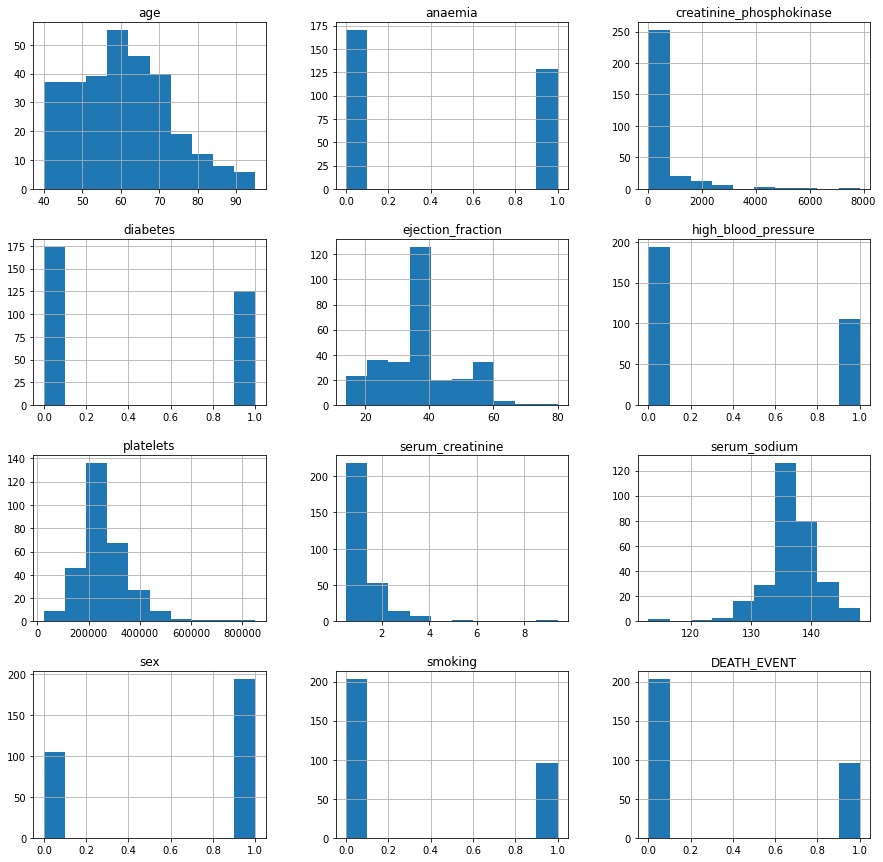

In [10]:
p = df.hist(figsize = (15,15))

It coud be interesting to see if there is a correlation with smoking from near:

In [11]:
tobacco = df.groupby(['smoking', 'DEATH_EVENT']).size()
tobacco

smoking  DEATH_EVENT
0        0              137
         1               66
1        0               66
         1               30
dtype: int64

In [12]:
old = df.groupby(['DEATH_EVENT', 'age']).size()
old

DEATH_EVENT  age   
0            40.000     7
             41.000     1
             42.000     6
             43.000     1
             44.000     2
             45.000    13
             46.000     2
             47.000     1
             49.000     3
             50.000    19
             51.000     3
             52.000     5
             53.000     9
             54.000     1
             55.000    14
             56.000     1
             57.000     1
             58.000     8
             59.000     1
             60.000    20
             60.667     1
             61.000     4
             62.000     4
             63.000     8
             64.000     3
             65.000    18
             66.000     2
             67.000     2
             68.000     3
             69.000     1
             70.000    18
             72.000     2
             73.000     3
             75.000     5
             77.000     1
             78.000     2
             79.000     1
             80.00

## Building ML Model

First we split the dataset.

In [13]:
from sklearn.model_selection import train_test_split

predict = 'DEATH_EVENT'

X = df.drop(predict, axis=1)
y = df[predict].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

And we can scale the data with Standard Scaler.

In [14]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

Now i will try different models and see how they are doing:

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [16]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(random_state=42, n_jobs=-1),
            'parameters': {
                'C': [0.1,0.5,1,5,10]
               }
        },
        
        'knn': {
            'model': KNeighborsClassifier(n_jobs=-1),
            'parameters': {
                'n_neighbors': [3,5,7,9,11,13]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(random_state=42, n_jobs=-1),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(random_state=42),
            'parameters': {
                'C': [0.1,0.5,1,5,10,20,30],
                'kernel': ['rbf','linear', 'poly', 'sigmoid'],
                'degree': [3,5,7,9]
            }
        }

    }
    
    scores = [] 
            
    for model_name, model_params in models.items():
        grid = GridSearchCV(model_params['model'], model_params['parameters'], cv=10, n_jobs=-1)
        grid.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': grid.best_params_,
            'score': grid.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 0.5},0.754743
1,knn,{'n_neighbors': 11},0.697233
2,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.719960
3,random_forest,{'n_estimators': 20},0.755138
4,svm,"{'C': 1, 'degree': 3, 'kernel': 'linear'}",0.777273


It seems that the best results has Random Forest Model. I will continue with it.

In [17]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)

The accuracy scores are not the best with mean of 85,7% there is room for improvement for sure. But for the moment I will leave it like that.

In [18]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1)

print("\nScores:\n", rf_scores)
print("\nMean scores:\n", rf_scores.mean())
print("\nStandard deviation:\n", rf_scores.std())


Scores:
 [0.65217391 0.60869565 0.65217391 0.95652174 0.72727273 0.81818182
 0.72727273 0.72727273 0.95454545 0.72727273]

Mean scores:
 0.7551383399209487

Standard deviation:
 0.11403847055415


In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [20]:
feature_names = list(df)
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature_names),reverse=True))

[(0.2345, 'serum_creatinine'), (0.185, 'ejection_fraction'), (0.1376, 'creatinine_phosphokinase'), (0.1292, 'platelets'), (0.1127, 'age'), (0.1077, 'serum_sodium'), (0.0258, 'smoking'), (0.0215, 'diabetes'), (0.02, 'high_blood_pressure'), (0.0166, 'anaemia'), (0.0095, 'sex')]


## Evaluating ML Model

In [21]:
predictions = rf.predict(X_test)

The confusion matrix says that my model discovered correctly 47 cases of 0 class missing 4 as 1 class and it doscovered correctly 16 pf 1 class missing 8 as 0 class.

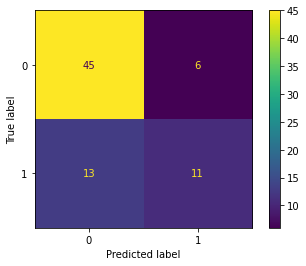

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test)

In [23]:
from sklearn.metrics import classification_report

clas_rep = classification_report(y_test, predictions)
print(clas_rep)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        51
           1       0.65      0.46      0.54        24

    accuracy                           0.75        75
   macro avg       0.71      0.67      0.68        75
weighted avg       0.73      0.75      0.73        75



In [24]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probabilities = rf.predict_proba(X_test)[:,1]

false_positive_rate_rf,true_positive_rate_rf,threshold_rf = roc_curve(y_test,y_probabilities)

roc_auc_score(y_test,y_probabilities)

0.801470588235294

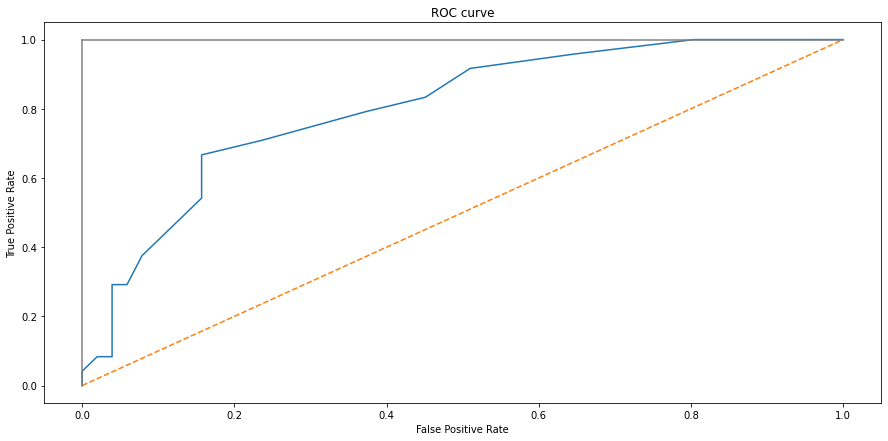

In [25]:
plt.figure(figsize=(15,7))
plt.title('ROC curve')
plt.plot(false_positive_rate_rf,true_positive_rate_rf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Test the model

Let's try the model on some data I am inputing.

I create a function to make predictions:

In [26]:
def predict_heart(Age, Anaemia, Creatinine_phosphokinase, Diabetes, Ejection_fraction, High_blood_pressure, Platelets, 
                  Serum_creatinine, Serum_sodium, Sex, Smoking):
    age = float(Age)
    anaemia = int(Anaemia)
    creatinine_phosphokinase = int(Creatinine_phosphokinase)
    diabetes = int(Diabetes)
    ejection_fraction = int(Ejection_fraction)
    high_blood_pressure = int(High_blood_pressure)
    platelets = float(Platelets)
    serum_creatinine = float(Serum_creatinine)
    serum_sodium = int(Serum_sodium)
    sex = int(Sex)
    smoking = int(Smoking)
    
    x = [[age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, 
          serum_creatinine, serum_sodium, sex, smoking]]
    x = s_scaler.transform(x)

    return rf.predict(x)

In [27]:
# Prediction 1
prediction = predict_heart(43, 0, 63, 0, 30, 0, 462000.00, 0.9, 129, 0, 0)[0]

if prediction:
  print('Oops! You have heart failure.')
else:
  print("Great! You don't have heart failure.")

Great! You don't have heart failure.


In [28]:
# Prediction 2
prediction = predict_heart(66, 0, 163, 1, 310, 1, 362000.00, 1.9, 229, 1, 1)[0]

if prediction:
  print('Oops! You have heart failure.')
else:
  print("Great! You don't have heart failure.")

Oops! You have heart failure.


## Pickling model for deployment

In [29]:
import pickle

pickle.dump(rf, open("heart-prediction-rfc-model.pkl", 'wb'))
pickle.dump(rf, open("heart-prediction-rfc-model.sav", "wb"))
pickle.dump(s_scaler, open("s_scaler.sav", "wb"))